<a href="https://colab.research.google.com/github/Aisyhnabilaaa/pcd-perbaikan-citra-pada-domain-spasial/blob/main/perbaikan_citra_pada_domain_spasial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage import median_filter, minimum_filter, maximum_filter
from scipy.ndimage import convolve
from scipy.ndimage import correlate


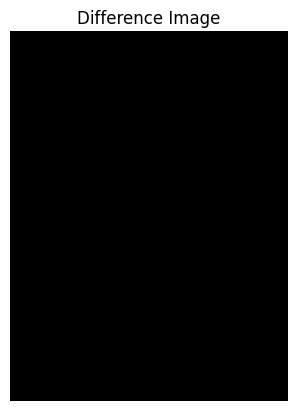

In [ ]:
# Baca dua gambar input
image1 = mpimg.imread('/content/bunga&bebek.jpg')
image2 = mpimg.imread('/content/bunga&bebek.jpg')

# Konversi gambar ke grayscale jika diperlukan
if image1.ndim > 2:
    image1 = np.mean(image1, axis=2)
if image2.ndim > 2:
    image2 = np.mean(image2, axis=2)

# Hitung perbedaan antara dua gambar
diffImage = np.abs(image1 - image2)

# Tampilkan gambar perbedaan
plt.imshow(diffImage, cmap='gray')
plt.axis('off')
plt.title('Difference Image')
plt.show()

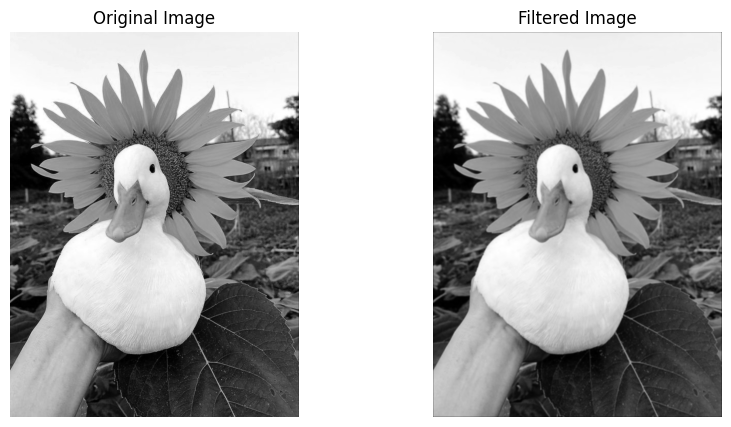

In [ ]:
# Baca gambar input
image = mpimg.imread('/content/bunga&bebek.jpg')

# Konversi gambar ke grayscale jika diperlukan
if image.ndim > 2:
    image = np.mean(image, axis=2)

# Ukuran filter
filter_size = 3

# Filter rata-rata
filter_kernel = np.ones((filter_size, filter_size)) / (filter_size ** 2)

# Terapkan filter rata-rata
filtered_image = convolve2d(image, filter_kernel, mode='same')

# Tampilkan gambar asli dan hasil filtering
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(filtered_image, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Filtered Image')

plt.show()

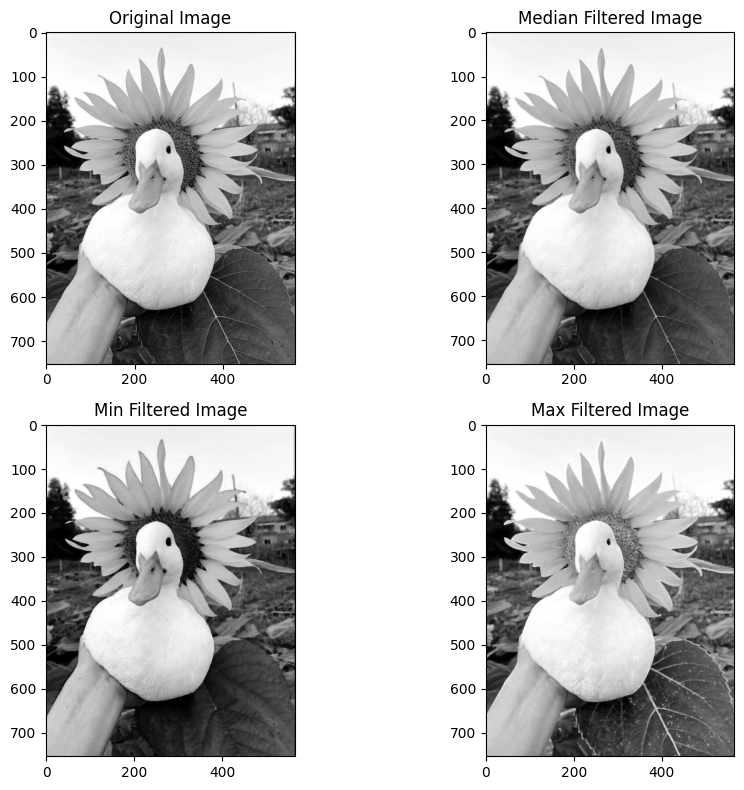

In [ ]:
# Load gambar
image = mpimg.imread('/content/bunga&bebek.jpg')

# Konversi ke grayscale jika diperlukan
if image.ndim == 3:
    image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

filter_size = 3

# Padding gambar
padded_image = np.pad(image, [(filter_size//2, filter_size//2), (filter_size//2, filter_size//2)], mode='edge')

# Filter median
median_filtered_image = median_filter(padded_image, size=filter_size)

# Filter min dan max
min_filtered_image = minimum_filter(padded_image, size=filter_size)
max_filtered_image = maximum_filter(padded_image, size=filter_size)

# Tampilkan gambar asli dan hasil filtering
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')

plt.subplot(2, 2, 3)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Min Filtered Image')

plt.subplot(2, 2, 4)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Max Filtered Image')

plt.tight_layout()
plt.show()

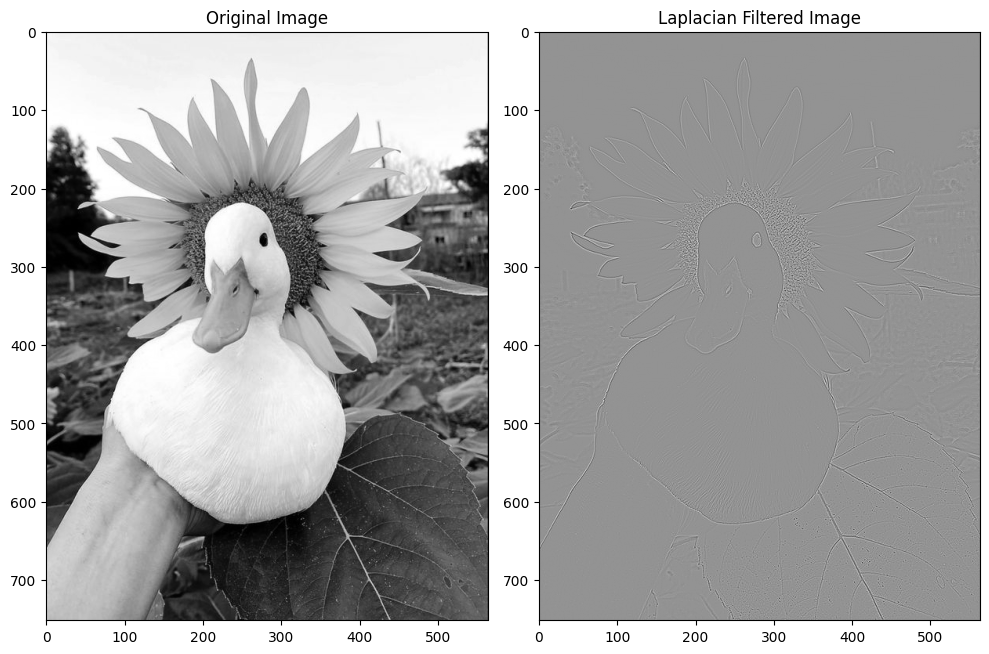

In [ ]:
# Load gambar
image = mpimg.imread('/content/bunga&bebek.jpg')

# Konversi ke grayscale jika diperlukan
if image.ndim == 3:
    image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Filter Laplacian
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
laplacian_filtered_image = correlate(image, laplacian_kernel)

# Tampilkan gambar asli dan hasil filtering
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filtered Image')

plt.tight_layout()
plt.show()

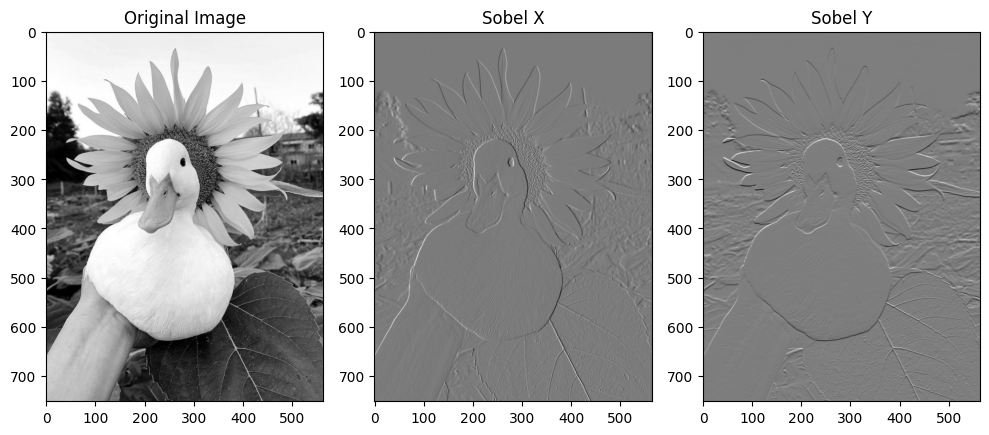

In [ ]:
# Load gambar
image = cv2.imread('/content/bunga&bebek.jpg', cv2.IMREAD_GRAYSCALE)

# Operasi gradient Sobel
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Tampilkan gambar asli dan hasil gradient Sobel
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.title('Sobel Y')

plt.tight_layout()
plt.show()